In [ ]:
import numpy as np
import pandas as pd


class logisticregression:
    ##init
   def __init__(self,lr):
        self.lr=lr
    ##softmax
   def softmax(self,u):
        expu=np.exp(u)
        return expu/np.sum(expu)
   ##cross entropy cost func
   def crossEntropy(self,p,q):
     return -np.vdot(p,np.log(q))

   ##cost evaluation
   def eval_L(self,X,Y,beta):
     N=X.shape[0]
     L=0.0
     for i in range(N):
       XiHat=X[i] ##augmented feature vector
       Yi=Y[i] ##ground truth
       qi=self.softmax(beta @ XiHat) ##probability vector

       L+=self.crossEntropy(Yi,qi) ##loss for each i
  
     return L

   ##logisticregression function 
   def logReg(self,X,Y,lr):
     numEpochs=100 ##epochs defined
     n,d=X.shape   ##n:n_samples,d:n_features
     X=np.insert(X,0,1,axis=1) ##augmented matrix
     k=Y.shape[1]
     beta=np.zeros((k,d+1))
     Lvals=[]
     for ep in range(numEpochs):

       L=self.eval_L(X,Y,beta)
       Lvals.append(L)

       print("Epoch is: "+str(ep)+" Cost is:"+str(L))

       prm=np.random.permutation(n) ##random values chosen to perform stochastic gradient descent

       for i in prm:
         XiHat=X[i]
         Yi=Y[i]

         qi=self.softmax(beta @ XiHat)##10X785 @ 785X1
         grad_Li=np.outer(qi-Yi,XiHat) ##gradient of loss

         beta-=lr*grad_Li ##parameter update
    
     return beta,Lvals

   ##predictor
   def predict(self,X,beta):
     X=np.insert(X,0,1,axis=1)
     N=X.shape[0]

     predictions=[]
     for i in range (N):
       XiHat=X[i]
       qi=self.softmax(beta @ XiHat)

       p=np.argmax(qi)

       predictions.append(p)
  
     return predictions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_csv('sample_data/mnist_train_small.csv')
test=pd.read_csv('sample_data/mnist_test.csv')

df = pd.DataFrame(train)
dff = pd.DataFrame(test)

##extracting y out of dataset
y_train=df.iloc[:,0]
y_test=dff.iloc[:,0]

##extracting x out of dataset
x_train=df.drop(df.columns[0], axis=1)
x_test=dff.drop(dff.columns[0], axis=1)


##converting dataframe to numpy array
x_train.to_numpy()
x_test.to_numpy()
y_train.to_numpy()
y_test.to_numpy()

##normalise x
x_train=x_train/255.0
x_test=x_test/255.0

y_train=pd.get_dummies(y_train).values ## converts to one_hot
x_train=x_train.values

x_test=x_test.values


In [ ]:
import matplotlib.pyplot as plt
lr=0.001
regressor=logisticregression(lr)
beta,Lvals=regressor.logReg(x_train,y_train,lr)


Epoch is: 0 Cost is:46049.39927478139
Epoch is: 1 Cost is:9675.64119094432
Epoch is: 2 Cost is:8078.206640302426
Epoch is: 3 Cost is:7403.345217040681
Epoch is: 4 Cost is:6991.433693325096
Epoch is: 5 Cost is:6727.509449189514
Epoch is: 6 Cost is:6507.233123443135
Epoch is: 7 Cost is:6349.370198114114
Epoch is: 8 Cost is:6219.849362706058
Epoch is: 9 Cost is:6132.553280989203
Epoch is: 10 Cost is:6025.6072918701675
Epoch is: 11 Cost is:5927.1769457777555
Epoch is: 12 Cost is:5860.597099641137
Epoch is: 13 Cost is:5791.072158464438
Epoch is: 14 Cost is:5732.007341822708
Epoch is: 15 Cost is:5683.152807971976
Epoch is: 16 Cost is:5654.931769131561
Epoch is: 17 Cost is:5591.236973960262
Epoch is: 18 Cost is:5532.365318285704
Epoch is: 19 Cost is:5499.952812113815
Epoch is: 20 Cost is:5488.240369671993
Epoch is: 21 Cost is:5422.0328839297335
Epoch is: 22 Cost is:5402.648485187161
Epoch is: 23 Cost is:5372.2038532716115
Epoch is: 24 Cost is:5335.132046241597
Epoch is: 25 Cost is:5317.363346

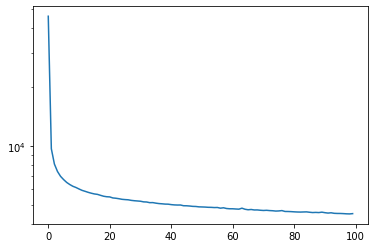

In [ ]:
plt.semilogy(Lvals)

In [ ]:
predictions=regressor.predict(x_test,beta)

In [ ]:
predictions[0:10]

[2, 1, 0, 4, 1, 4, 9, 6, 9, 0]

In [ ]:
y_test[0:10]

0    2
1    1
2    0
3    4
4    1
5    4
6    9
7    5
8    9
9    0
Name: 7, dtype: int64

In [ ]:
c=x_test.shape[0]
r=0
for i in range(c):
  if predictions[i]==y_test[i]:
    r+=1
accuracy=(r/c)*100

print ("accuracy:"+str(accuracy))

accuracy:92.13921392139214
